In [273]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import *

In [274]:
x=np.linspace(0,10,30)

In [275]:
a=4
b=2
y=a+b*x+np.random.standard_normal(len(x))*2

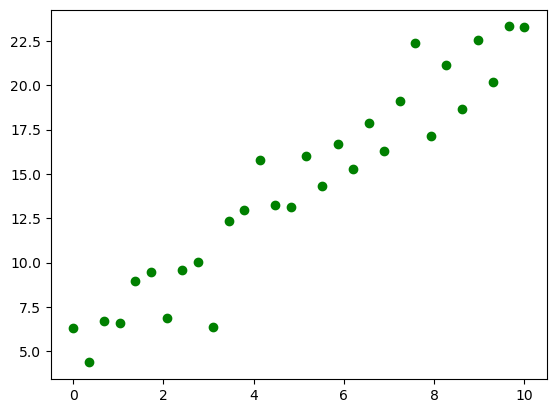

In [276]:
plt.plot(x,y,'go')

In [277]:
X=np.array([x*i for i in range(2)]).T

In [278]:
line=sk.linear_model.LinearRegression()

In [279]:
line.fit(X,y)

LinearRegression()

In [280]:
t=np.linspace(0,10,500)
T=np.array([t*i for i in range(2)]).T
yp=line.predict(T)

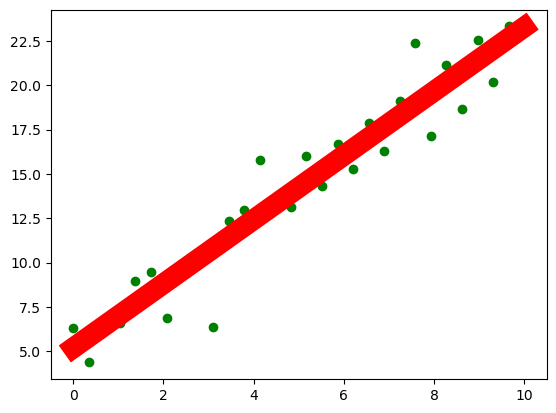

In [281]:
plt.plot(x,y,'go')
plt.plot(t,yp,'r-',lw=15)

In [282]:
pipe=sk.pipeline.make_pipeline(
    sk.preprocessing.PolynomialFeatures(1),
    sk.linear_model.LinearRegression())

In [283]:
pipe.fit(x.reshape(len(x),1),y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [284]:
yp2=pipe.predict(t[:,np.newaxis])

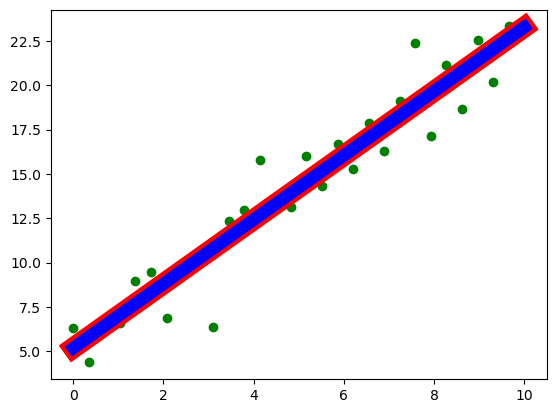

In [285]:
plt.plot(x,y,'go')
plt.plot(t,yp,'r-',lw=15)
plt.plot(t,yp2,'b-',lw=9)
#plt.plot(t,yp2,'k-',lw=4)

In [286]:
cost= lambda x,y,a,b: ((y-(a+b*x))**2)

In [287]:
mse= lambda x,y,a,b: cost(x,y,a,b).mean()

In [288]:
a=np.linspace(-10,10,30)

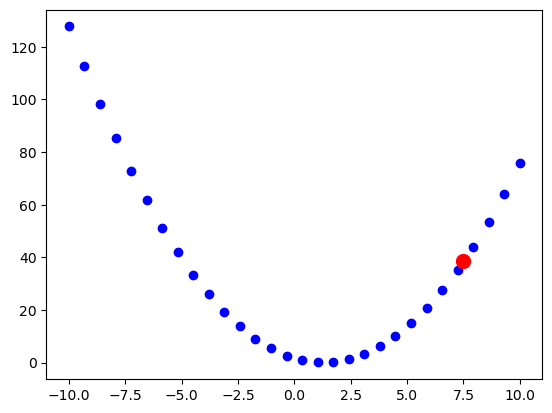

In [289]:
plt.plot(a,cost(1,2.3,a,1),'bo')
plt.plot(7.5,cost(1,2.3,7.5,1),'ro',markersize=10)

In [301]:
def mse_grad(x,y,a,b):
    yp=a+b*x
    e=y-yp
    #N=len(x)
    #b_grad = (-2/N) *(x * e).sum()  # slope
    #a_grad = (-2/N) * e.sum() 
    a_grad=-2*e.mean()
    b_grad=-2*(x*e).mean()
    return a_grad,b_grad

In [316]:
def grad_descent(x,y,lr=0.01,epochs=3000):
    #a=np.random.random()
    #b=np.random.random()
    a=20
    b=20
    for i in range(epochs):
        a_g,b_g=mse_grad(x,y,a,b)
        a-=lr*a_g
        b-=lr*b_g

    return a,b
    

In [317]:
a,b=grad_descent(x,y)

In [318]:
a,b=grad_descent(x,y)
a,b

(5.187511271748694, 1.8083828127243808)

In [319]:
myModel=lambda x,a,b: a+b*x

In [320]:
a,b

(5.187511271748694, 1.8083828127243808)

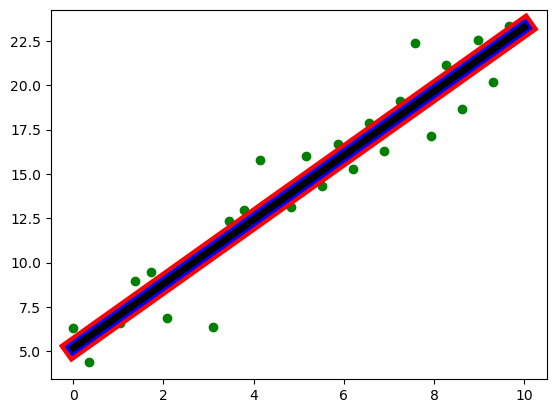

In [321]:
plt.plot(x,y,'go')
plt.plot(t,yp,'r-',lw=15)
plt.plot(t,yp2,'b-',lw=9)
plt.plot(t,myModel(t,a,b),'k-',lw=5)